/var/folders/m6/mgjfjp2s2b97v0p3wmv8x69m0000gn/T/ipykernel_49821/1419144318.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('GBPUSD=X', period='5y', interval='1d')
[*********************100%***********************]  1 of 1 completed
/Users/snowyan/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/snowyan/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/snowyan/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarnin

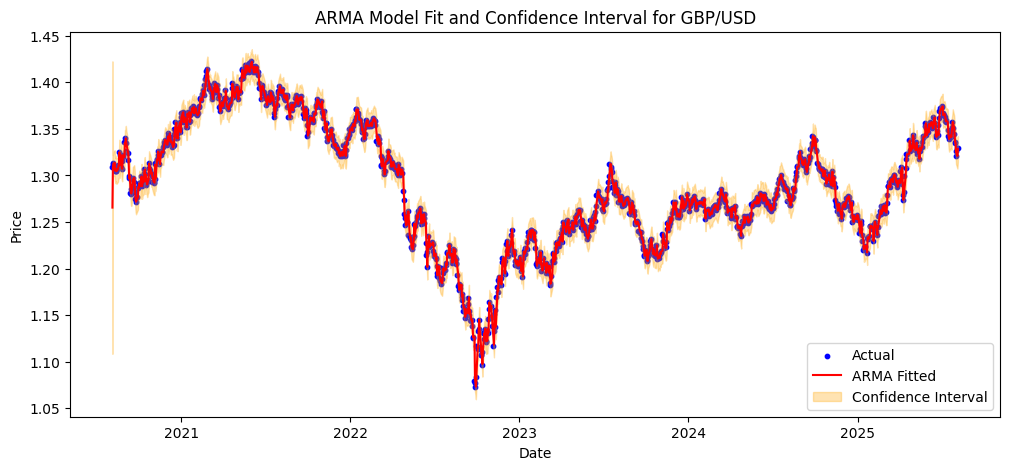

In [4]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Download 5 years of GBP/USD daily data
data = yf.download('GBPUSD=X', period='5y', interval='1d')
prices = data['Close'].dropna()

# Fit ARMA model (ARMA is ARIMA with d=0)
model = ARIMA(prices, order=(2, 0, 2))
model_fit = model.fit()

# Get in-sample predictions and confidence intervals
pred_res = model_fit.get_prediction()
fitted = pred_res.predicted_mean
conf_int = pred_res.conf_int()

# Plot actual prices (scatter), ARMA fitted (line), and confidence interval (color)
plt.figure(figsize=(12, 5))
plt.scatter(prices.index, prices.values, label='Actual', color='blue', s=10)
plt.plot(prices.index, fitted, label='ARMA Fitted', color='red')
plt.fill_between(prices.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3, label='Confidence Interval')

plt.title('ARMA Model Fit and Confidence Interval for GBP/USD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/Users/snowyan/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/snowyan/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Absolute Error (Last 5 Days): 0.003665


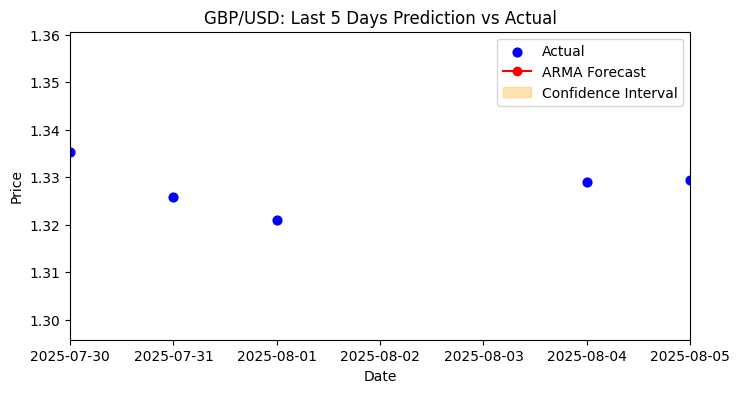

In [7]:
import numpy as np

# Forecast the next 5 days
forecast_res = model_fit.get_forecast(steps=5)
forecast = forecast_res.predicted_mean
conf_int_forecast = forecast_res.conf_int()

# Get actual values for the last 5 days
actual_last5 = prices[-5:]

# Calculate mean absolute error
mae = np.mean(np.abs(forecast.values - actual_last5.values))
print(f"Mean Absolute Error (Last 5 Days): {mae:.6f}")

# Plot zoomed-in prediction vs actual (x-axis: last 5 days only)
plt.figure(figsize=(8, 4))
plt.scatter(actual_last5.index, actual_last5.values, label='Actual', color='blue', s=40)
plt.plot(forecast.index, forecast.values, label='ARMA Forecast', color='red', marker='o')
plt.fill_between(forecast.index, conf_int_forecast.iloc[:, 0], conf_int_forecast.iloc[:, 1], color='orange', alpha=0.3, label='Confidence Interval')
plt.title('GBP/USD: Last 5 Days Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xlim([actual_last5.index[0], actual_last5.index[-1]])  # Limit x-axis to last 5 days
plt.legend()
plt.show()